# Path Configuration

In [35]:
import os
import sys
import argparse

root = "../"*3
src_path = os.path.join(root, "kyoka")
sample_path = os.path.join(root, "sample")
sys.path.append(root)
sys.path.append(src_path)
sys.path.append(sample_path)

import logging as log
log.basicConfig(format='[%(levelname)s] %(message)s', level=log.DEBUG)

from kyoka.algorithm.montecarlo.montecarlo import MonteCarlo
from kyoka.algorithm.td_learning.sarsa import Sarsa
from kyoka.algorithm.td_learning.q_learning import QLearning
from kyoka.algorithm.td_learning.sarsa_lambda import SarsaLambda
from kyoka.algorithm.td_learning.q_lambda import QLambda

from kyoka.policy.epsilon_greedy_policy import EpsilonGreedyPolicy
from kyoka.finish_rule.watch_iteration_count import WatchIterationCount

from sample.maze.maze_domain import MazeDomain
from sample.maze.maze_keras_value_function import MazeKerasValueFunction
from sample.maze.maze_helper import MazeHelper
from sample.maze.maze_performance_logger import MazePerformanceLogger
from sample.maze.maze_transformer import MazeTransformer

# Define Const for Performance Test

# Setup Global Item for Performance Test

In [36]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt

maze_file_path = lambda maze_type: "../script/%s.txt" % maze_type
transform_file_path = lambda maze_type: "../script/%s_transformed.txt" % maze_type

def gen_callbacks(maze_type, transform_timing):
    callbacks = [MazePerformanceLogger()]
    if maze_type in ["blocking", "shortcut"]:
        transfomer = MazeTransformer()
        transfomer.set_transformation(transform_timing, transform_file_path(maze_type))
        callbacks.append(transfomer)
    return callbacks

def run_performance_test(maze_type, rl_algo, epsilon, test_length, transform_timing):
    domain = MazeDomain()
    domain.read_maze(maze_file_path(maze_type))
    value_func = MazeKerasValueFunction(domain)
    policy = EpsilonGreedyPolicy(eps=epsilon)
    [rl_algo.set_gpi_callback(callback) for callback in callbacks]
    rl_algo.setUp(domain, policy, value_func)
    rl_algo.run_gpi(nb_iteration=test_length, callbacks=callbacks)
    return callbacks[0].step_log, callbacks[0].policy_log

def visualize_maze(maze_type):
    domain = MazeDomain()
    domain.read_maze(maze_file_path(maze_type))
    print domain.get_maze_shape()
    print MazeHelper.visualize_maze(domain.maze)

def visualize_step_transition(step_log):
    print "minimum step => %d" % min(step_log)
    plt.plot(step_log, label="step")
    plt.xlabel("GPI iteration")
    plt.ylabel("step")
    plt.show()
    
def visualize_policy_transition(step_log, policy_log, sampling_interval):
    sampled_log = [(item[0]+1, item[1]) for item in enumerate(policy_log) if (item[0]+1)%sampling_interval==0]
    for iteration, log in sampled_log:
        minimum_step = min(step_log[iteration-sampling_interval:iteration])
        print "After %d th iteration (minimum step => %d)" % (iteration, minimum_step)
        print log
        print

# DynaMaze

In [37]:
MAZE_TYPE = "dyna"
TRANSFORM_TIMING = 0
visualize_maze(MAZE_TYPE)

(6, 9)
-------XG
--X----X-
S-X----X-
--X------
-----X---
---------


## Sarsa

minimum step => 14


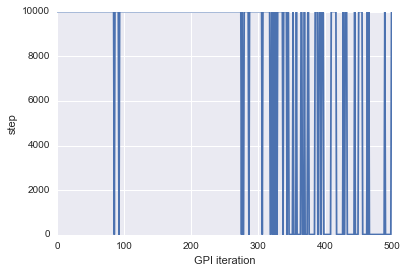

After 50 th iteration (minimum step => 10000)
v<>^<<v>G
<vv^^>v>^
>v-vv>v>^
>>^<>>>>^
>^<^>>>^^
-^<v>-^^^

After 100 th iteration (minimum step => 14)
v>-vv<v>G
<<vv<vv>^
^v-<<>v>^
>>^^>>>>^
^^>>^^^^^
-^>^^>v<^

After 150 th iteration (minimum step => 10000)
vv-vvvv>G
>>v<vvv>^
^^->>>v>^
v>^<>>>>^
<>^^v>>>^
^>^>>>^^^

After 200 th iteration (minimum step => 10000)
-<>v>>v>G
^>v>>vv>^
v^-v>>v>^
<<^>>>>>^
^^>^^>^^^
-<>>v>>^^

After 250 th iteration (minimum step => 10000)
vv<>^<v>G
v>vvv>v>^
<<-<<vv>^
^>^v>>>>^
<<>v<>>^^
^>v^>>^^^

After 300 th iteration (minimum step => 14)
->-v>vv>G
^^vvvvv>^
>>->>vv>^
v^^>>>>>^
<>>^^>>^^
>>>^^>^^^

After 350 th iteration (minimum step => 14)
>>-vv>v>G
>^vvv>v>^
vv->>>v>^
>v^>>>>>^
v>>^^>>>^
-<^^^>>>^

After 400 th iteration (minimum step => 14)
>>->v>v>G
^^vv>>v>^
vv->>>v>^
>v^>>>>>^
>>>^^>>^^
^>>^>>>^^

After 450 th iteration (minimum step => 14)
>^>^vvv>G
^vv>vvv>^
vv->v>v>^
vv^>>>>>^
>>v^^>^^^
^>>>>>>^^

After 500 th iteration (minimum step => 14)


In [27]:
TEST_LENGTH = 500
EPSILON = 0.3
step_log, policy_log = run_performance_test(
    maze_type=MAZE_TYPE, rl_algo=Sarsa(alpha=0.1, gamma=0.7),
    epsilon=EPSILON, test_length=TEST_LENGTH, transform_timing=TRANSFORM_TIMING)
visualize_step_transition(step_log)
visualize_policy_transition(step_log, policy_log, sampling_interval=50)

minimum step => 16


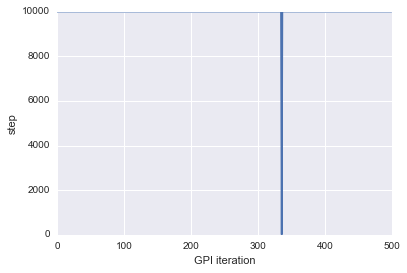

After 50 th iteration (minimum step => 10000)
->->^<->G
>>v<^v^>^
>v-^>vv>^
>>^v>>>>^
^^v>>>>>^
->v<^>v^^

After 100 th iteration (minimum step => 10000)
>>>^<v->G
>>v^><v>^
<^-><>>>^
v>^^v>>>^
<<v>>><^^
^>v<^>^>^

After 150 th iteration (minimum step => 10000)
-v>>^<<>G
>vvvvvv>^
>v->v<v>^
v>^>^<>>^
v<>>^>>>^
-<v>>>>>^

After 200 th iteration (minimum step => 10000)
>^<vvvv>G
<vv>><v>^
>>->v>>>^
>^^>>>>>^
v>^v^>>>^
-<>v<>>^^

After 250 th iteration (minimum step => 10000)
>v>>>v<>G
>>v>>^v>^
<^-<^>v>^
^>^>>>>>^
>>vv^>>^^
>>v<<>v^^

After 300 th iteration (minimum step => 10000)
->>^vvv>G
>vvv>>>>^
vv-<vvv>^
vv^>>>>>^
>><>^^>^^
-^^>>>^>^

After 350 th iteration (minimum step => 16)
>>-<>^v>G
>vv>vv>>^
>v-v>vv>^
>v^<>>>>^
v^<^^>>^^
-<>>>>^>^

After 400 th iteration (minimum step => 10000)
v>->vvv>G
<<v>>><>^
vv-vv^v>^
<<^>>>>>^
^^>^^>>>^
>v<^>>>v^

After 450 th iteration (minimum step => 10000)
>^<>^>->G
>^v<^vv>^
<^->>vv>^
vv^>>>>>^
>>v<^>>>^
^>v<>>>>^

After 500 th iteration (minimum 

In [30]:
TEST_LENGTH = 500
EPSILON = 0.7
step_log, policy_log = run_performance_test(
    maze_type=MAZE_TYPE, rl_algo=Sarsa(alpha=0.1, gamma=0.7),
    epsilon=EPSILON, test_length=TEST_LENGTH, transform_timing=TRANSFORM_TIMING)
visualize_step_transition(step_log)
visualize_policy_transition(step_log, policy_log, sampling_interval=50)

# QLearning

minimum step => 14


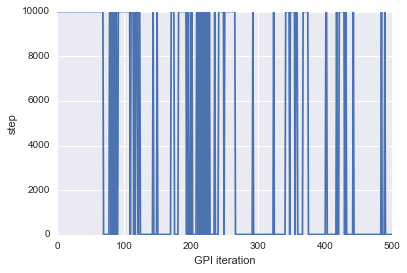

After 50 th iteration (minimum step => 10000)
vv>^<vv>G
<<v^>vv>^
vv-v>vv>^
>>^>>>>>^
^^>v^^^^^
>v>v>>v>^

After 100 th iteration (minimum step => 14)
>v<vvvv>G
>>v>vvv>^
<^->>>v>^
vv^>>>>>^
v<>>^^>^^
-<v>^>v^^

After 150 th iteration (minimum step => 14)
-v-vv>->G
>>vvvvv>^
<^-v>>v>^
vv^>>>>>^
>>>^^>>^^
>>^^^>^^^

After 200 th iteration (minimum step => 14)
-<>vv>->G
v>v<vvv>^
vv->vvv>^
>>^>>>>>^
>>>>^^>^^
^^^^>>>^^

After 250 th iteration (minimum step => 14)
vv>^v>->G
>vv>vvv>^
>v-vv>v>^
vv^>>>>>^
>>>^^>^>^
-^>>^>^^^

After 300 th iteration (minimum step => 14)
vv>vv>v>G
vvv<v>v>^
vv->>vv>^
>v^>>>>>^
>>>^^>^^^
>^^^^>^^^

After 350 th iteration (minimum step => 14)
>^>vv>v>G
^^vvv>>>^
vv-v>>v>^
>>^>>>>>^
>>>^^>^>^
-^^^^>^^^

After 400 th iteration (minimum step => 14)
v>>^>v<>G
vvvv>vv>^
vv->>vv>^
vv^>>>>>^
>>>>^>>^^
>>>>^>^^^

After 450 th iteration (minimum step => 14)
v^>>>^v>G
<vvv>vv>^
>v->>vv>^
vv^>>>>>^
>>>>^>^^^
>^>^^>^^^

After 500 th iteration (minimum step => 14)
>>>>^<v>G

In [28]:
TEST_LENGTH = 500
EPSILON = 0.3
step_log, policy_log = run_performance_test(
    maze_type=MAZE_TYPE, rl_algo=QLearning(alpha=0.1, gamma=0.7),
    epsilon=EPSILON, test_length=TEST_LENGTH, transform_timing=TRANSFORM_TIMING)
visualize_step_transition(step_log)
visualize_policy_transition(step_log, policy_log, sampling_interval=50)

minimum step => 14


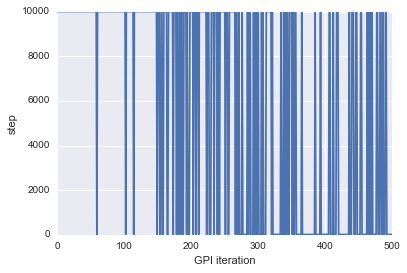

After 50 th iteration (minimum step => 10000)
v<>^vvv>G
v<v>v>v>^
<<->v>v>^
^v^>>>>>^
>>>^^>^^^
^>^^>>^>^

After 100 th iteration (minimum step => 14)
-<>>>^v>G
^vv>vvv>^
>v->vvv>^
>>^>>>>>^
<^>>^^^>^
>v^>^>>^^

After 150 th iteration (minimum step => 14)
>>>>^vv>G
vvvv>>v>^
>v-v>vv>^
>v^>>>>>^
>>>^^>^^^
>^^^>>^>^

After 200 th iteration (minimum step => 14)
>>>v>vv>G
>vv<>>v>^
>>-vvvv>^
vv^>>>>>^
>v<^^^^>^
>^>>>>^>^

After 250 th iteration (minimum step => 14)
>>>>>vv>G
>vv>>vv>^
v>->>vv>^
<v^>>>>>^
>>>>^^>>^
^>>>>>^^^

After 300 th iteration (minimum step => 14)
->>^>>->G
vvvvvvv>^
>>->>vv>^
<^^>>>>>^
^>>>^^^>^
>>>^^>>>^

After 350 th iteration (minimum step => 14)
>>>vvvv>G
vvvvvvv>^
v>->>vv>^
<<^>>>>>^
^v>^^^>^^
>>>^>>>^^

After 400 th iteration (minimum step => 14)
>>>>>vv>G
>^v>>>v>^
v^-vv>v>^
vv^>>>>>^
>>>>^>^^^
^>>^^>>^^

After 450 th iteration (minimum step => 14)
>>>>vvv>G
^^vvv>v>^
>v->>vv>^
>v^>>>>>^
>>>>^>>>^
>^^^>>^^^

After 500 th iteration (minimum step => 14)
>>>>v>v>G

In [31]:
TEST_LENGTH = 500
EPSILON = 0.7
step_log, policy_log = run_performance_test(
    maze_type=MAZE_TYPE, rl_algo=QLearning(alpha=0.1, gamma=0.7),
    epsilon=EPSILON, test_length=TEST_LENGTH, transform_timing=TRANSFORM_TIMING)
visualize_step_transition(step_log)
visualize_policy_transition(step_log, policy_log, sampling_interval=50)

# SarsaLambda

In [ ]:
import time
start = time.time()
TEST_LENGTH = 1
EPSILON = 0.3
step_log, policy_log = run_performance_test(
    maze_type=MAZE_TYPE, rl_algo=SarsaLambda(alpha=0.1, gamma=0.9),
    epsilon=EPSILON, test_length=TEST_LENGTH, transform_timing=TRANSFORM_TIMING)
visualize_step_transition(step_log)
visualize_policy_transition(step_log, policy_log, sampling_interval=1)
print "time = %s" % (start - time.time())

In [ ]:
TEST_LENGTH = 50
EPSILON = 0.7
step_log, policy_log = run_performance_test(
    maze_type=MAZE_TYPE, rl_algo=SarsaLambda(alpha=0.1, gamma=0.7),
    epsilon=EPSILON, test_length=TEST_LENGTH, transform_timing=TRANSFORM_TIMING)
visualize_step_transition(step_log)
visualize_policy_transition(step_log, policy_log, sampling_interval=5)

# QLambda

minimum step => 14


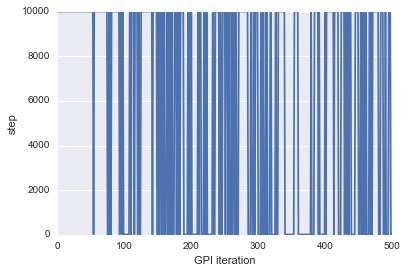

After 50 th iteration (minimum step => 10000)
-<>^<>v>G
^>v^>>v>^
^^->v>v>^
v<^>>>>>^
<<>>^>>^^
^v>v>>>>^

After 100 th iteration (minimum step => 14)
>^>>>>v>G
<^vvv>v>^
vv->vvv>^
>v^>>>>>^
>>>>^^>>^
-^^^>>^^^

After 150 th iteration (minimum step => 14)
>v>vvvv>G
v>v>vvv>^
vv->>vv>^
vv^>>>>>^
>>>^^>>>^
^^>>>>^>^

After 200 th iteration (minimum step => 14)
>>>vvvv>G
>vv<vvv>^
>v-vvvv>^
>v^>>>>>^
>>>^^>^>^
>>>>>>^>^

After 250 th iteration (minimum step => 14)
v>>vvvv>G
vvv>v>v>^
>v->v>v>^
>>^>>>>>^
>>>^^^^^^
^^^^>>^^^

After 300 th iteration (minimum step => 14)
vv-vvvv>G
>>vvvvv>^
v^->vvv>^
vv^>>>>>^
<>>>^>>>^
^^^>>>^>^

After 350 th iteration (minimum step => 14)
v>-vvvv>G
<<v>vvv>^
vv-v>vv>^
vv^>>>>>^
>>>^^^>^^
^^^^^>^^^

After 400 th iteration (minimum step => 14)
>^<>>vv>G
vvvvv>v>^
vv->>vv>^
>v^>>>>>^
>>>>^^>^^
->v^^>>^^

After 450 th iteration (minimum step => 14)
-v>v>>->G
>vvvvvv>^
>>->>vv>^
vv^>>>>>^
<<>>^^^^^
^^^^^>>^^

After 500 th iteration (minimum step => 14)
-v-v>vv>G

In [29]:
TEST_LENGTH = 500
EPSILON = 0.3
step_log, policy_log = run_performance_test(
    maze_type=MAZE_TYPE, rl_algo=QLambda(alpha=0.1, gamma=0.7),
    epsilon=EPSILON, test_length=TEST_LENGTH, transform_timing=TRANSFORM_TIMING)
visualize_step_transition(step_log)
visualize_policy_transition(step_log, policy_log, sampling_interval=50)

minimum step => 14


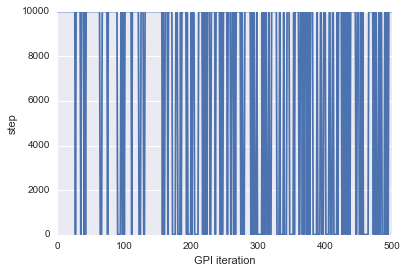

After 50 th iteration (minimum step => 14)
>>>^>^v>G
>^v>v>v>^
<v->v>v>^
>>^>>>>>^
>^>>^^^^^
^^>v^>^^^

After 100 th iteration (minimum step => 14)
->>v>>v>G
^>v>vvv>^
^v->>>v>^
>v^>>>>>^
>>>^^>>^^
>^>^>>^^^

After 150 th iteration (minimum step => 14)
->>>>v->G
^>v^>vv>^
<<->>vv>^
vv^>>>>>^
v>>>^^>>^
>>^>^>>>^

After 200 th iteration (minimum step => 14)
>>-v>>v>G
^^vvv>>>^
>v-<vvv>^
>v^>>>>>^
>>>^^^^>^
^^>^>>^>^

After 250 th iteration (minimum step => 14)
v>-v>vv>G
<<vv>>v>^
^v-vv>v>^
>v^>>>>>^
>>>^^>^^^
^^>>>>>^^

After 300 th iteration (minimum step => 14)
vv>vvvv>G
>>v>>>v>^
vv-v>>v>^
vv^>>>>>^
>>>>^>>>^
^>^^^>^^^

After 350 th iteration (minimum step => 14)
vv>v>vv>G
>vv>>vv>^
>v-v>>v>^
>v^>>>>>^
>>>>^>>>^
>>>>>>^^^

After 400 th iteration (minimum step => 14)
>^>v>vv>G
v^v>>>v>^
<<-v>>v>^
^>^>>>>>^
<>>>^^^^^
^>^>^>^^^

After 450 th iteration (minimum step => 14)
->>>vvv>G
^<vvvvv>^
^>->>>v>^
vv^>>>>>^
>>>^^>>>^
->>>>>>^^

After 500 th iteration (minimum step => 14)
>>>v>>v>G
v^

In [41]:
TEST_LENGTH = 500
EPSILON = 0.7
step_log, policy_log = run_performance_test(
    maze_type=MAZE_TYPE, rl_algo=QLambda(alpha=0.1, gamma=0.7),
    epsilon=EPSILON, test_length=TEST_LENGTH, transform_timing=TRANSFORM_TIMING)
visualize_step_transition(step_log)
visualize_policy_transition(step_log, policy_log, sampling_interval=50)